### Experimento Termodinámica
Se calentaron 4.5 litros de agua en una olla y se tomaron las mediciones desde el tiempo t=0 hasta t=26.
A continuación se presenta un programa que crea al vector Tiempo con 27 espacialmente distribuidos y al vector Temp con las observaciones tomadas. Con estos datos se realiza un gráfico de dispersión para analizar de forma gráfica el comportamiento de los mismos.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[24.2 29.8 31.7 32.2 34.2 36.2 37.5 39.2 41.3 41.4 42.8 44.1 46.  48.2
 50.9 51.9 53.5 53.9 56.8 58.9 60.  64.6 64.4 64.9 65.4 69.3 74.5]
(27,)


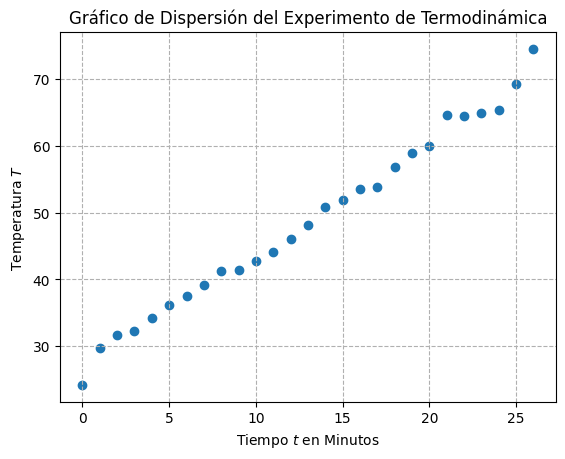

In [12]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

# Generar los datos
tiempo = np.array([i for i in range(27)])
print(tiempo)
Temp = np.array([24.2, 29.8, 31.7, 32.2, 34.2, 36.2, 37.5, 39.2, 41.3, 41.4, 42.8,
              44.1, 46, 48.2, 50.9, 51.9, 53.5, 53.9, 56.8, 58.9, 60,
              64.6, 64.4, 64.9, 65.4, 69.3, 74.5])
print(Temp)
print(np.shape(Temp))

# Crear la gráfica de dispersión
plt.scatter(tiempo,Temp)

# Configurar la gráfica
plt.ylabel('Temperatura $T$')
plt.xlabel('Tiempo $t$ en Minutos')
plt.title('Gráfico de Dispersión del Experimento de Termodinámica')
plt.grid(linestyle='--')

# Mostrar la gráfica
plt.show()

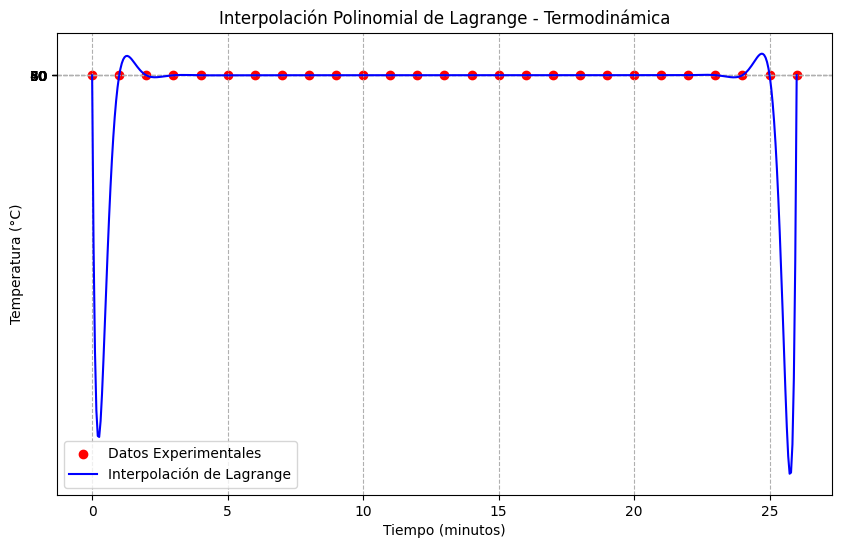

In [ ]:
def lagrange_interpolation(x, y):
    """
    Construye el polinomio de interpolación de Lagrange.

    Parámetros:
    x -- arreglo con los valores de las abscisas
    y -- arreglo con los valores de las ordenadas

    Retorna:
    polinomio -- función evaluable del polinomio interpolante
    """
    def L(k, t):
        lk = 1
        for i in range(len(x)):
            if i != k:
                lk *= (t - x[i]) / (x[k] - x[i])
        return lk

    def polinomio(t):
        suma = 0
        for k in range(len(x)):
            suma += y[k] * L(k, t)
        return suma

    return polinomio

# Crear el polinomio de Lagrange
P = lagrange_interpolation(tiempo, Temp)

# Puntos para graficar la curva interpolada
t_eval = np.linspace(tiempo[0], tiempo[-1], 500)
T_eval = [P(t) for t in t_eval]

plt.figure(figsize=(10,6))
plt.scatter(tiempo, Temp, color='red', label='Datos Experimentales')
plt.plot(t_eval, T_eval, color='blue', label='Interpolación de Lagrange')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Interpolación Polinomial de Lagrange - Termodinámica')
plt.xticks(np.arange(0, 26, 5))
plt.yticks([0, 30, 40, 50, 60, 70, 80])
plt.grid(linestyle='--')
plt.legend()
plt.show()



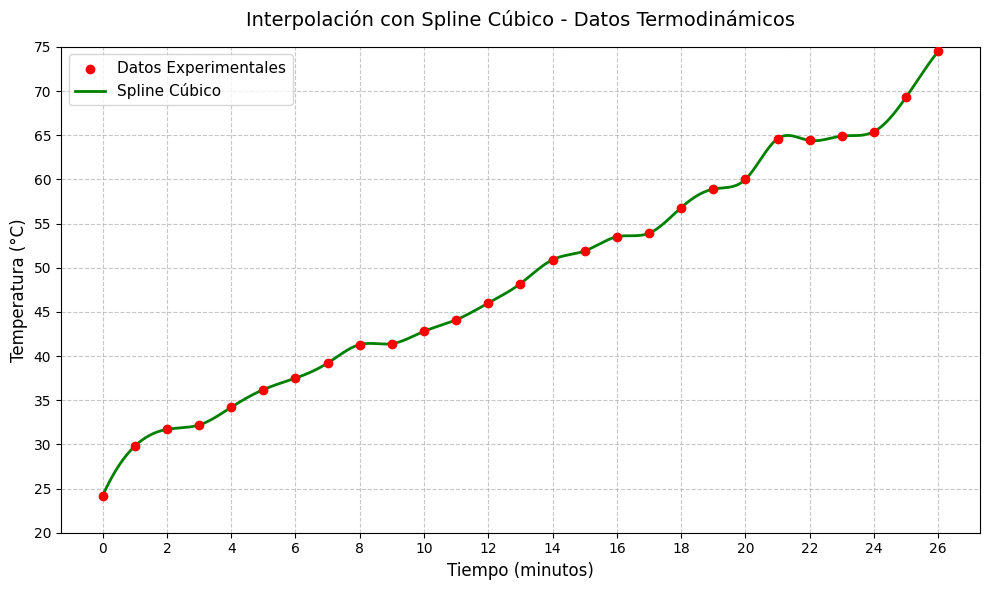

In [ ]:
from scipy.interpolate import CubicSpline

# Crear el spline cúbico
spline = CubicSpline(tiempo, Temp)

# Puntos para evaluar el spline
t_eval = np.linspace(tiempo.min(), tiempo.max(), 500)
T_spline = spline(t_eval)

# Límites ajustados
plt.figure(figsize=(10, 6))
y_min = np.floor(Temp.min() / 5) * 5  
y_max = np.ceil(Temp.max() / 5) * 5   
plt.scatter(tiempo, Temp, color='red', label='Datos Experimentales', zorder=3)
plt.plot(t_eval, T_spline, color='green', label='Spline Cúbico', linewidth=2)
plt.xlabel('Tiempo (minutos)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.title('Interpolación con Spline Cúbico - Datos Termodinámicos', pad=15, fontsize=14)
plt.xticks(np.arange(0, 27, 2))
plt.yticks(np.arange(y_min, y_max + 5, 5))  
plt.ylim(y_min, y_max)  
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


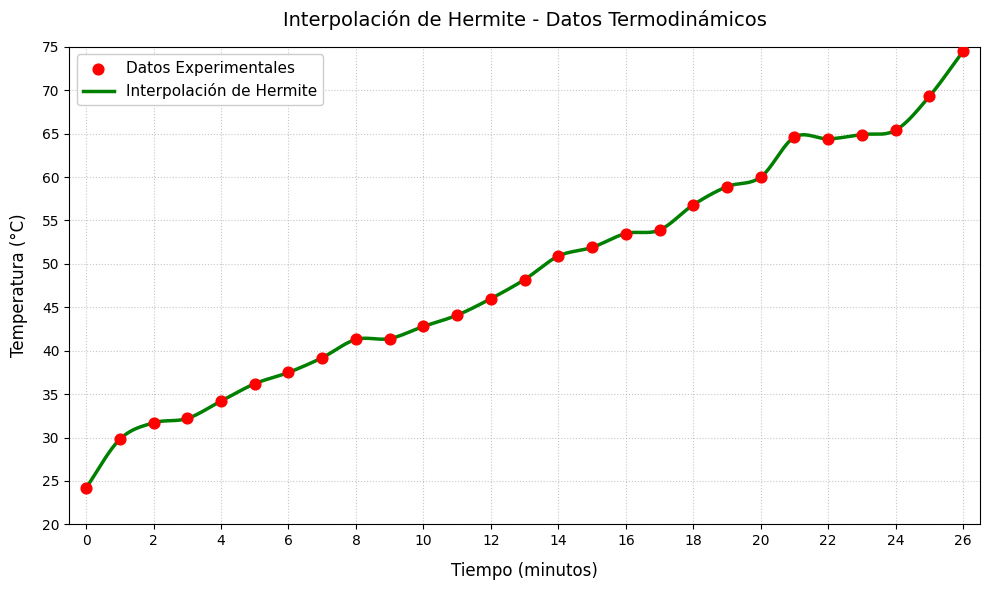

In [ ]:
from scipy.interpolate import CubicHermiteSpline

# Estimar derivadas
dy = np.zeros_like(Temp)
dy[0] = (Temp[1] - Temp[0]) / (tiempo[1] - tiempo[0])  # adelante
dy[-1] = (Temp[-1] - Temp[-2]) / (tiempo[-1] - tiempo[-2])  # atrás

for i in range(1, len(Temp)-1):
    dy[i] = (Temp[i+1] - Temp[i-1]) / (tiempo[i+1] - tiempo[i-1])  # central

# Crear interpolante de Hermite
hermite_interp = CubicHermiteSpline(tiempo, Temp, dy)

# Evaluar en puntos densos
t_eval = np.linspace(0, 26, 500)
T_eval = hermite_interp(t_eval)

# Graficar con límites ajustados
plt.figure(figsize=(10, 6))
y_min = max(20, np.floor(Temp.min()/5)*5)  
y_max = np.ceil(Temp.max()/5)*5 
plt.scatter(tiempo, Temp, color='red', s=60, label='Datos Experimentales', zorder=3)
plt.plot(t_eval, T_eval, color='green', linewidth=2.5, label='Interpolación de Hermite')
plt.xticks(np.arange(0, 27, 2))  
plt.yticks(np.arange(y_min, y_max+1, 5))  
plt.ylim(y_min, y_max)  
plt.xlim(tiempo.min()-0.5, tiempo.max()+0.5) 
plt.xlabel('Tiempo (minutos)', fontsize=12, labelpad=10)
plt.ylabel('Temperatura (°C)', fontsize=12, labelpad=10)
plt.title('Interpolación de Hermite - Datos Termodinámicos', fontsize=14, pad=15)
plt.grid(linestyle=':', alpha=0.7)
plt.legend(fontsize=11, framealpha=1)
plt.tight_layout()
plt.show()